In [1]:
import pandas as pd;
import numpy as np

In [2]:
df=pd.read_csv("/content/credit_underwriting.csv");

In [3]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [5]:
df.isnull().sum()/df.shape[0]*100

,0
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,2.747000
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,9.563856
loan_status,0.000000
loan_percent_income,0.000000


In [6]:
df['person_emp_length'].fillna(df['person_emp_length'].mean(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)

<ipython-input-6-640a2abaec19>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].mean(), inplace=True)
<ipython-input-6-640a2abaec19>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [7]:
print(df.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [8]:
duplicate_rows = df[df.duplicated()]
df.drop_duplicates(inplace=True)
print(duplicate_rows)

       person_age  person_income person_home_ownership  person_emp_length  \
15975          23          42000                  RENT                5.0   
15989          23          90000              MORTGAGE                7.0   
15995          24          48000              MORTGAGE                4.0   
16025          24          10000                  RENT                8.0   
16028          23         100000              MORTGAGE                7.0   
...           ...            ...                   ...                ...   
32010          42          39996              MORTGAGE                2.0   
32047          36         250000                  RENT                2.0   
32172          49         120000              MORTGAGE               12.0   
32259          39          40000                   OWN                4.0   
32279          43          11340                  RENT                4.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status 

In [9]:


# Import necessary libraries
import pandas as pd
import numpy as np

# Calculate IQR for outlier detection
def find_outliers_IQR(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers


# Example usage for specific columns (replace with your desired columns)
outliers_person_age = find_outliers_IQR(df, 'person_age')
outliers_person_income = find_outliers_IQR(df, 'person_income')
outliers_loan_amnt = find_outliers_IQR(df, 'loan_amnt')

# Print or further analyze the outliers
print("Outliers in person_age:\n", outliers_person_age)
print("\nOutliers in person_income:\n", outliers_person_income)
print("\nOutliers in loan_amnt:\n", outliers_loan_amnt)

Outliers in person_age:
        person_age  person_income person_home_ownership  person_emp_length  \
81            144         250000                  RENT                4.0   
183           144         200000              MORTGAGE                4.0   
575           123          80004                  RENT                2.0   
747           123          78000                  RENT                7.0   
29121          50         900000              MORTGAGE               11.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

             loan_intent loan_grade  loan_amnt  lo

In [10]:
# label encoding
df.replace({"cb_person_default_on_file":{'N':0,'Y':1}},inplace=True)
df

<ipython-input-10-09b0d607aefa>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"cb_person_default_on_file":{'N':0,'Y':1}},inplace=True)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,1,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,0,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,0,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,0,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,0,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,0,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,0,26


In [11]:
from sklearn.preprocessing import OneHotEncoder

# Assuming the dataset is loaded into `df`

# Step 1: Define the nominal columns you want to encode
nominal_columns = ['person_home_ownership', 'loan_intent']  # Adjust based on actual column names

# Step 2: Filter columns that exist in the dataset
nominal_columns = [col for col in nominal_columns if col in df.columns]
if not nominal_columns:
    print("No valid columns for one-hot encoding. Check column names.")
else:
    print(f"Columns to encode: {nominal_columns}")

    # Step 3: Apply one-hot encoding if columns are valid
    subset = df[nominal_columns]
    encoder = OneHotEncoder(drop='first', sparse_output=False)  # Ensure sparse_output=False for dense array
    encoded_columns = encoder.fit_transform(subset)

    # Create a DataFrame with the encoded columns
    encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(nominal_columns))

    # Ensure the indexes match
    encoded_df.index = df.index  # Align indexes explicitly
    dataset = pd.concat([df.drop(columns=nominal_columns), encoded_df], axis=1)
    # Step 4: Update the dataset by concatenating the new encoded columns and dropping the old ones
    df_encoded = pd.concat([df.drop(columns=nominal_columns), encoded_df], axis=1)

    # Final Dataset
    print("One-hot encoding completed. Here is the updated dataset:")
    print(df_encoded)
    df_encoded.info()

Columns to encode: ['person_home_ownership', 'loan_intent']
One-hot encoding completed. Here is the updated dataset:
       person_age  person_income  person_emp_length loan_grade  loan_amnt  \
0              22          59000              123.0          D      35000   
1              21           9600                5.0          B       1000   
2              25           9600                1.0          C       5500   
3              23          65500                4.0          C      35000   
4              24          54400                8.0          C      35000   
...           ...            ...                ...        ...        ...   
32576          57          53000                1.0          C       5800   
32577          54         120000                4.0          A      17625   
32578          65          76000                3.0          B      35000   
32579          56         150000                5.0          B      15000   
32580          66          42000    

In [12]:
df_encoded

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,123.0,D,35000,16.02,1,0.59,1,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,21,9600,5.0,B,1000,11.14,0,0.10,0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,25,9600,1.0,C,5500,12.87,1,0.57,0,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,23,65500,4.0,C,35000,15.23,1,0.53,0,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,24,54400,8.0,C,35000,14.27,1,0.55,1,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,C,5800,13.16,0,0.11,0,30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32577,54,120000,4.0,A,17625,7.49,0,0.15,0,19,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32578,65,76000,3.0,B,35000,10.99,1,0.46,0,28,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
32579,56,150000,5.0,B,15000,11.48,0,0.10,0,26,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:


from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'loan_grade' column
df_encoded['loan_grade'] = label_encoder.fit_transform(df_encoded['loan_grade'])

# Display the updated DataFrame
df_encoded

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,123.0,3,35000,16.02,1,0.59,1,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,21,9600,5.0,1,1000,11.14,0,0.10,0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,25,9600,1.0,2,5500,12.87,1,0.57,0,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,23,65500,4.0,2,35000,15.23,1,0.53,0,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,24,54400,8.0,2,35000,14.27,1,0.55,1,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,2,5800,13.16,0,0.11,0,30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32577,54,120000,4.0,0,17625,7.49,0,0.15,0,19,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32578,65,76000,3.0,1,35000,10.99,1,0.46,0,28,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
32579,56,150000,5.0,1,15000,11.48,0,0.10,0,26,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# prompt: apply min max scaling on all the columns

from sklearn.preprocessing import MinMaxScaler

# Assuming df_encoded is your DataFrame
# Select only numerical columns for scaling
numerical_cols = df_encoded.select_dtypes(include=np.number).columns

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the updated DataFrame
df_encoded

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0.016129,0.009173,1.000000,0.500000,1.000000,0.595506,1.0,0.710843,1.0,0.035714,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.008065,0.000934,0.040650,0.166667,0.014493,0.321348,0.0,0.120482,0.0,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.040323,0.000934,0.008130,0.333333,0.144928,0.418539,1.0,0.686747,0.0,0.035714,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.024194,0.010257,0.032520,0.333333,1.000000,0.551124,1.0,0.638554,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.032258,0.008406,0.065041,0.333333,1.000000,0.497191,1.0,0.662651,1.0,0.071429,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,0.298387,0.008172,0.008130,0.333333,0.153623,0.434831,0.0,0.132530,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32577,0.274194,0.019346,0.032520,0.000000,0.496377,0.116292,0.0,0.180723,0.0,0.607143,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32578,0.362903,0.012008,0.024390,0.166667,1.000000,0.312921,1.0,0.554217,0.0,0.928571,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
32579,0.290323,0.024350,0.040650,0.166667,0.420290,0.340449,0.0,0.120482,0.0,0.857143,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
import xgboost
import sklearn

print("XGBoost version:", xgboost.__version__)
print("Scikit-learn version:", sklearn.__version__)

XGBoost version: 2.1.3
Scikit-learn version: 1.6.0


In [16]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# ... (Your existing code for data loading, preprocessing, and encoding) ...

# Assuming df_encoded from the previous code is available

# Split the data into features (X) and target (y)
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=56) # You can adjust hyperparameters here

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.9361505243676743
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      5073
         1.0       0.96      0.74      0.83      1411

    accuracy                           0.94      6484
   macro avg       0.94      0.87      0.90      6484
weighted avg       0.94      0.94      0.93      6484



In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost with tuned parameters
xgb_model = xgb.XGBClassifier(
    max_depth=5,
    learning_rate=0.01,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    objective='binary:logistic',
    random_state=42
)

# Fit model with early stopping
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=True
)

# Evaluate
y_pred = xgb_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy}")

[0]	validation_0-logloss:0.52172
[1]	validation_0-logloss:0.51659
[2]	validation_0-logloss:0.51341
[3]	validation_0-logloss:0.50974
[4]	validation_0-logloss:0.50511
[5]	validation_0-logloss:0.50201
[6]	validation_0-logloss:0.49831
[7]	validation_0-logloss:0.49571
[8]	validation_0-logloss:0.49151
[9]	validation_0-logloss:0.48715
[10]	validation_0-logloss:0.48378
[11]	validation_0-logloss:0.48010
[12]	validation_0-logloss:0.47795
[13]	validation_0-logloss:0.47448
[14]	validation_0-logloss:0.47064
[15]	validation_0-logloss:0.46703
[16]	validation_0-logloss:0.46351
[17]	validation_0-logloss:0.46074
[18]	validation_0-logloss:0.45837
[19]	validation_0-logloss:0.45524
[20]	validation_0-logloss:0.45196
[21]	validation_0-logloss:0.44901
[22]	validation_0-logloss:0.44571
[23]	validation_0-logloss:0.44285
[24]	validation_0-logloss:0.43965
[25]	validation_0-logloss:0.43704
[26]	validation_0-logloss:0.43469
[27]	validation_0-logloss:0.43265
[28]	validation_0-logloss:0.43006
[29]	validation_0-loglos

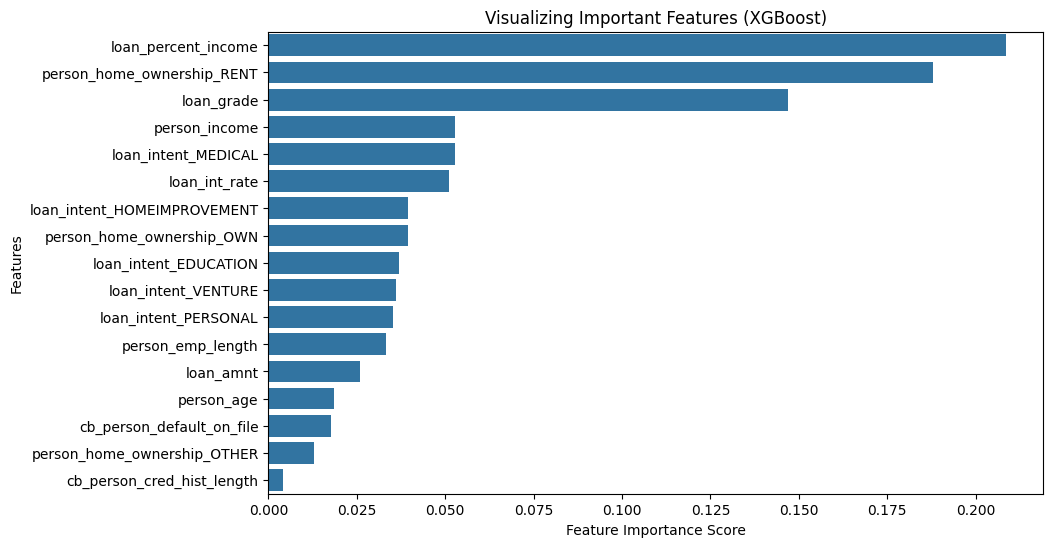

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree



# XGBoost feature importance plot
xgb_feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_feature_importances, y=xgb_feature_importances.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features (XGBoost)")
plt.show()

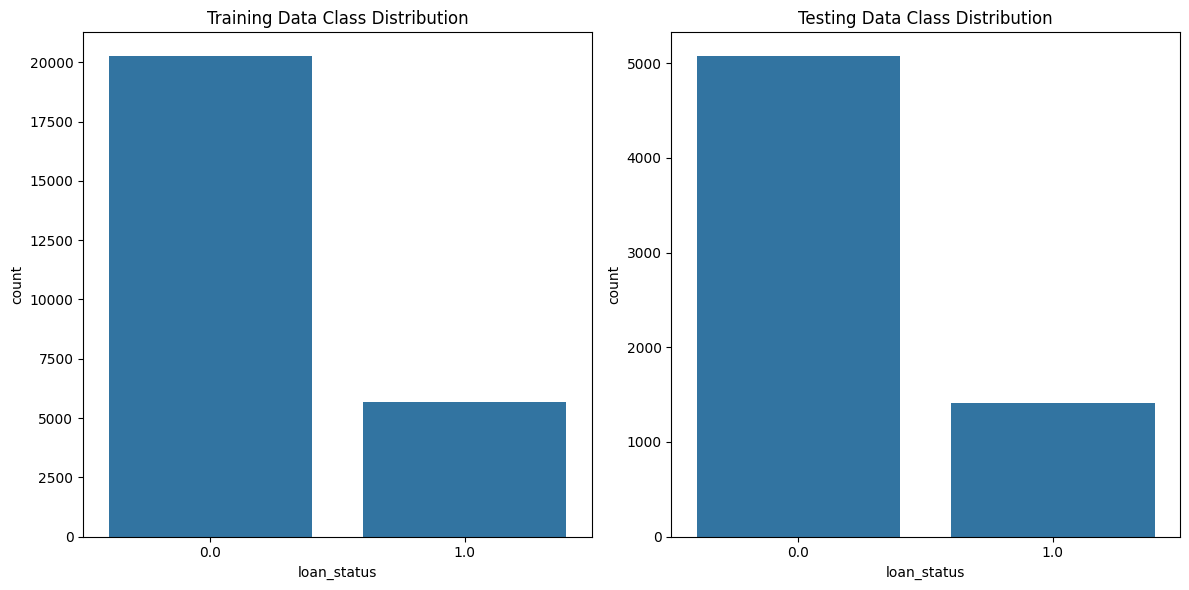

In [19]:
# prompt: training testing data visualistion

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, y_train, X_test, y_test are defined from previous code

# ... (Your existing code) ...

# Visualize training data distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Training Data Class Distribution')

# Visualize testing data distribution
plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title('Testing Data Class Distribution')

plt.tight_layout()
plt.show()

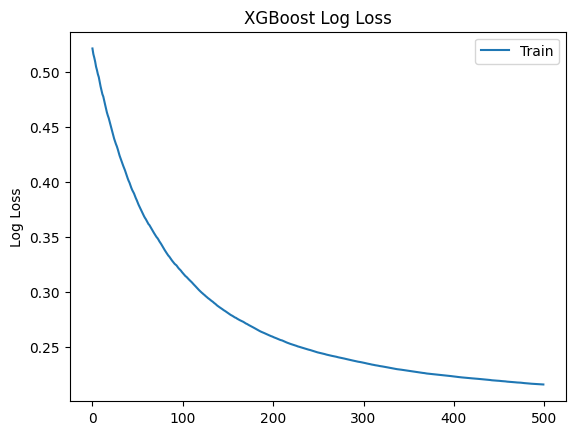

In [37]:
# Assuming xgb_model.evals_result() contains the evaluation results
results = xgb_model.evals_result()

# Extract training and validation loss
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# Plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')

ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()